## 3.3 신경망 모델 구현하기

### 3.3.1 인공 신경망 (ANN)

### 3.3.2 간단한 분류 모델 구현하기

#### 분류의 목적은 정답을 맞추는것

In [1]:
# 넘파이,skearn을 사용하여 array로 이용하려함
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

##### 학습 및  평가에 사용할 데이터셋 생성

In [2]:
# 학습용 80개의 2차원 데이터 생성

In [3]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features = n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]]
                              , shuffle = True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features = n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]]
                            , shuffle = True, cluster_std=0.3)


make_blobs 가상 데이터 생성 함수  
n_samples = 표본데이터의 수 (default = 100)  
n_features = 차원  
centerts= 생성할 클러스터의 수 or 중심 ( [n_centers, n_features] 크기의 배열)  
cluster_std = 클러스터의 표준편차  
document: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [4]:
x_train


array([[-0.82662363,  0.72941722],
       [ 1.24667867, -1.13637233],
       [-1.1635424 , -0.92398973],
       [ 1.58837023, -1.12443126],
       [ 0.95665428, -0.92421483],
       [ 0.74114388,  1.03890283],
       [ 1.64951863,  0.76724772],
       [-0.92310129,  1.31864702],
       [-0.86159916, -1.33239423],
       [ 0.94068651,  1.26831757],
       [-0.79267454,  0.45407335],
       [ 0.89215047, -0.4607342 ],
       [ 0.68923791, -0.86100768],
       [ 0.67211516,  1.01025908],
       [-1.03602501,  1.28966211],
       [-1.16396177, -1.11494609],
       [-0.78867697, -0.96297813],
       [-0.83299872, -0.86290236],
       [-1.43077486, -1.10252522],
       [-0.68880931,  0.4235397 ],
       [ 1.08825945,  1.08672305],
       [ 1.05012256,  0.96969537],
       [ 0.84380245,  0.66665709],
       [-0.86261045,  1.28529815],
       [-0.62526666,  0.91775287],
       [ 0.50492303, -0.48910994],
       [-0.93993545,  1.23421493],
       [ 1.23066997, -1.32107606],
       [-0.62177499,

In [5]:
y_train

array([3, 2, 1, 2, 2, 0, 0, 3, 1, 0, 3, 2, 2, 0, 3, 1, 1, 1, 1, 3, 0, 0,
       0, 3, 3, 2, 3, 2, 1, 0, 1, 1, 0, 3, 0, 2, 2, 2, 1, 0, 3, 1, 3, 1,
       0, 2, 0, 0, 3, 0, 3, 3, 2, 3, 2, 2, 0, 1, 0, 1, 3, 1, 1, 2, 3, 1,
       2, 0, 2, 0, 3, 3, 0, 1, 2, 1, 1, 2, 2, 3])

In [ ]:
# 위에서 만든 레이블 4개짜리는 두개로 만들어주기

In [11]:
# 라벨(정답)을 달아주는것. 

def label_map(y_,from_,to_):
    y = np.copy(y_)
    for f in from_:
        y[y_==f] = to_
    return y

In [12]:
y_train


array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [13]:
# 0,1 은 0으로 라벨링, 2,3은 1으로 라벨링
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [14]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

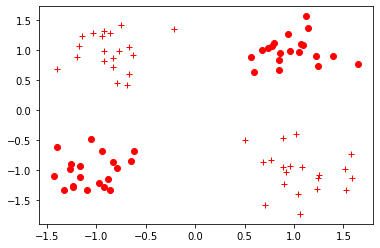

In [10]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [16]:
# 넘파이 형식으로 된 데이터를 파이토치 텐서 데이터로 변환
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [17]:
x_train

tensor([[-0.8266,  0.7294],
        [ 1.2467, -1.1364],
        [-1.1635, -0.9240],
        [ 1.5884, -1.1244],
        [ 0.9567, -0.9242],
        [ 0.7411,  1.0389],
        [ 1.6495,  0.7672],
        [-0.9231,  1.3186],
        [-0.8616, -1.3324],
        [ 0.9407,  1.2683],
        [-0.7927,  0.4541],
        [ 0.8922, -0.4607],
        [ 0.6892, -0.8610],
        [ 0.6721,  1.0103],
        [-1.0360,  1.2897],
        [-1.1640, -1.1149],
        [-0.7887, -0.9630],
        [-0.8330, -0.8629],
        [-1.4308, -1.1025],
        [-0.6888,  0.4235],
        [ 1.0883,  1.0867],
        [ 1.0501,  0.9697],
        [ 0.8438,  0.6667],
        [-0.8626,  1.2853],
        [-0.6253,  0.9178],
        [ 0.5049, -0.4891],
        [-0.9399,  1.2342],
        [ 1.2307, -1.3211],
        [-0.6218, -0.6767],
        [ 1.1254,  1.5702],
        [-1.2619, -0.9873],
        [-1.4007, -0.6049],
        [ 0.8473,  0.8468],
        [-0.7666,  0.9841],
        [ 1.3936,  0.8989],
        [ 1.0581, -1

In [18]:
y_train

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

#### 신경망 모델 구현

In [29]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        # input size와 hidden size를 받아 구현하겠다 표현
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size= hidden_size
        
        # 신경망을 통해 계산되는 과정(연산) 정의
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    # 차례로 실행하기 위해 forward()이용
    def forward(self, input_tensor):
        linear_1 = self.linear_1(input_tensor)
        relu=self.relu(linear_1)
        linear_2 = self.linear_2(relu)
        out=self.sigmoid(linear_2)
        return out

In [36]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 20000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [37]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7599660158157349


In [38]:

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7566346526145935
Train loss at 100 is 0.22099480032920837
Train loss at 200 is 0.11250142008066177
Train loss at 300 is 0.06797092407941818
Train loss at 400 is 0.04569350928068161
Train loss at 500 is 0.032953985035419464
Train loss at 600 is 0.02483646385371685
Train loss at 700 is 0.01947719417512417
Train loss at 800 is 0.015756256878376007
Train loss at 900 is 0.01303078979253769
Train loss at 1000 is 0.010914446786046028
Train loss at 1100 is 0.009302929043769836
Train loss at 1200 is 0.008009563200175762
Train loss at 1300 is 0.006961470004171133
Train loss at 1400 is 0.006108137778937817
Train loss at 1500 is 0.005421134177595377
Train loss at 1600 is 0.004848630167543888
Train loss at 1700 is 0.004370605573058128
Train loss at 1800 is 0.003971806727349758
Train loss at 1900 is 0.003634932916611433
Train loss at 2000 is 0.003346924902871251
Train loss at 2100 is 0.0030981171876192093
Train loss at 2200 is 0.0028812133241444826
Train loss at 2300 is 0.002690

Train loss at 19100 is 0.00016848069208208472
Train loss at 19200 is 0.00016743291052989662
Train loss at 19300 is 0.00016639554814901203
Train loss at 19400 is 0.00016537235933355987
Train loss at 19500 is 0.00016435884754173458
Train loss at 19600 is 0.00016335352847818285
Train loss at 19700 is 0.00016237057570833713
Train loss at 19800 is 0.0001613913627807051
Train loss at 19900 is 0.00016042629431467503


In [39]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.00016796424461062998


In [40]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.0133,  0.5506],
        [ 0.7989, -0.0728],
        [-0.9335, -0.6839],
        [-1.1917,  0.2595],
        [ 0.0134,  1.0636]])), ('linear_1.bias', tensor([-6.5182e-01,  2.0072e+00,  9.6529e-04,  8.6490e-01,  4.4117e-01])), ('linear_2.weight', tensor([[ 0.2960, -2.0151, -0.9477, -1.1844, -0.9844]])), ('linear_2.bias', tensor([-2.3916]))])


In [41]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.00010849133104784414
